<a href="https://colab.research.google.com/github/TusharGupta-07/First_machine_learning_project_bank./blob/master/Machine_learning_project_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**IMPORTING LIBRARIES**




In [57]:
#import libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sklearn
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


**-> UPLOAD FILES**

In [58]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling copy.xlsx to Bank_Personal_Loan_Modelling copy (1).xlsx


 **-> LOAD DATA AS .xlsx**

FILE Source*** https://www.kaggle.com/itsmesunil/bank-loan-modelling

In [59]:
import io
!pip install -q xlrd

user_data = pd.read_excel('Bank_Personal_Loan_Modelling copy.xlsx',"Data")
#user_data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

**--> INSPECTING DATA**


**head() method is used to return top n (5 by default) rows of a data frame or series.**

In [60]:
#TOP 10 ROWS OF OUR DATA SET

user_data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


**tail() function returns last n rows from the object based on position.**

In [61]:
#BOTTOM 10 ROWS OF OUR DATA SET
user_data.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.000000,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.900000,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800000,1,0,0,0,0,1,1


describe() is used to view some basic statistical details like count, mean, std, min, max etc. of a data frame or a series of numeric values.

In [62]:
user_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


OBSERVATION : describe()

1.We observe experience is below 0, experience cannot be negative 

2.Income data is skewed.

3.Mortgage column can be ignored as in most cases house is not mortgaged.

4.Zip code is related to area, hence ignoring it for now

5.People with higher income takes Personal Loan but people with lower income does not take loan.

6.Data of personal loan is overlaped wrt to most variables.

7.As per given data 480 people out of 5000, took Personal Loan  in the earlier campaign.






In [63]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**-> SHAPE OF DATA**

In [64]:
user_data.shape

(5000, 14)

**-> CHECKING DATA TYPES**

In [65]:
user_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

**CHECKING NULL DATA IN THE .csv FILE. BUT, NO NULL DATA FOUND**

In [66]:
user_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

HOW MANY VALUES ARE BELOW ZERO

In [67]:
user_data[user_data['Experience']<0].shape

(52, 14)

we have found 52 values below 0, this is an error

We got negative values in Experience column in our data set so we need to clean this, we are replacing the negative values with the median.

In [68]:
mdn = int(user_data['Experience'].median()) #This will calculate median of column Experience
for i in range(len(user_data)):
    if user_data['Experience'].iloc[i] < 0:
        user_data['Experience'].iloc[i] = mdn

In [69]:
user_data['Experience'].describe()

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

**-> corr(), Find the pairwise correlation of all columns in the dataframe. Any NAN values are automatically excluded and,for any non-numeric data type columns in the dataframe it is ignored.**

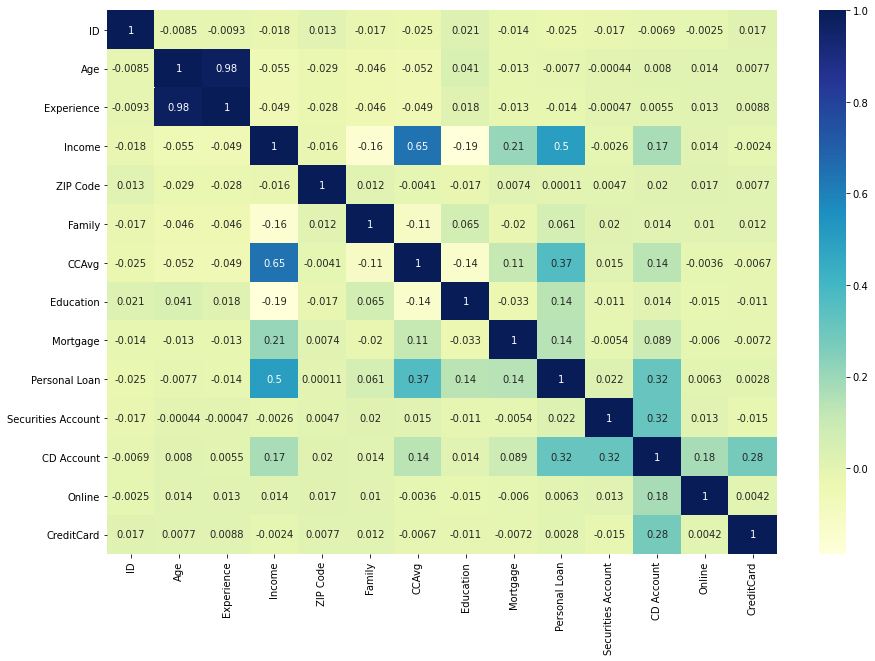

In [70]:
bank_corr=user_data.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(bank_corr,cmap="YlGnBu",annot=True)

**OBSERVATION :**

We found that, 'Age' and 'Experience' are highly co-related
and, also 'CCAvg' and 'Income'.

also, there is almost Negligible relation between Personal loan and ZIP Code.

and, 'CCAvg' and 'Income' also have high correlation

In our data set we do not found any impact of 'ID' and 'ZIP Code'column, so, this will considered as NOISY data so, we decided to drop it

In [71]:
user_data.drop(['ID','ZIP Code'], axis=1) #axis=1 represents column


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


***EDA - EXPLORATORY DATA ANALYSIS ***

**Unique values in each column**

In [72]:
#this will print all unique values in each column of our data set

uniqueValues = user_data.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


**NUMBER OF PEOPLE WITH ZERO MORTGAGE**

In [73]:
user_data[user_data['Mortgage']==0].shape

(3462, 14)

**OBSERVATION :**

The number of people with zero morgage are 3462, that means majority of people don’t have mortgage


**NUMBER OF PEOPLE WITH ZERO CREDIT CARD SPENDING PER MONTH**

In [74]:
user_data[user_data['CCAvg']==0].shape

(106, 14)

**OBSERVATION :**

Number of people with zero credit card spending per month is 106, that means thousands of people use their credit card for making transactions per month

SPLITING DATA INTO GROUPS BASED ON Personal Loan, i.e., MEAN,MEDIAN 

In [75]:
user_data.groupby(['Personal Loan']).agg(['mean','median'])

ID                Age  ... Online CreditCard       
                      mean  median       mean  ... median       mean median
Personal Loan                                  ...                         
0              2512.165487  2518.5  45.367257  ...      1   0.293584      0
1              2390.650000  2342.0  45.066667  ...      1   0.297917      0

[2 rows x 26 columns]

SPLITING DATA INTO GROUPS BASED ON Personal Loan i.e., MAX, MIN

In [76]:
user_data.groupby(['Personal Loan']).agg(['min','max'])

ID       Age     Experience  ... CD Account Online     CreditCard    
              min   max min max        min  ...        max    min max        min max
Personal Loan                               ...                                     
0               1  5000  23  67          0  ...          1      0   1          0   1
1              10  4981  26  65          0  ...          1      0   1          0   1

[2 rows x 26 columns]

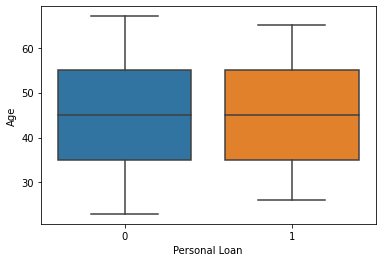

In [77]:
sns.boxplot(x='Personal Loan',y='Age',data=user_data)

**OBSERVATION :**

Age does not impact much to the chance of a person who take personal loan 

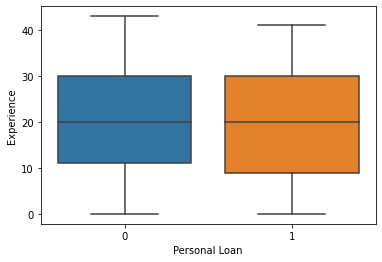

In [78]:
sns.boxplot(x='Personal Loan',y='Experience',data=user_data)

**OBSERVATION :**

Experience does not impact much to the chance of a person who take Personal Loan 

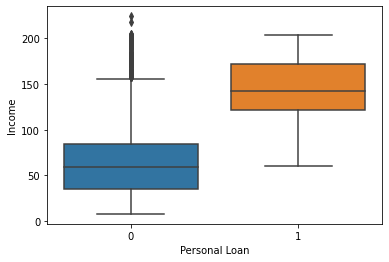

In [79]:
sns.boxplot(x='Personal Loan',y='Income',data=user_data)

**OBSERVATION :**

Person with higher Income take more Personal Loan, But person with lower income does not take Personal Loan

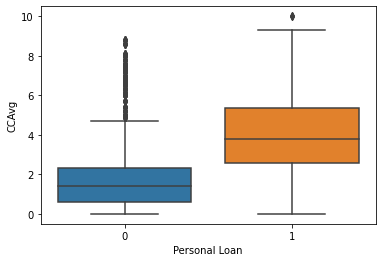

In [80]:
sns.boxplot(x='Personal Loan',y='CCAvg',data=user_data)

**OBSERVATION :**

Person with higher CCAvg(credit card spending per month) take more Personal Loan, But person with lower CCAvg does not take Personal Loan

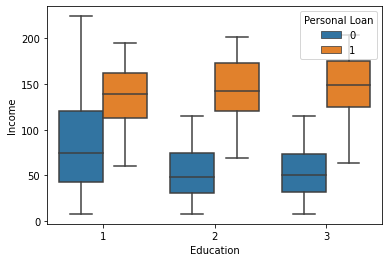

In [81]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=user_data)

**OBSERVATION :**

Person with  education level 1 have higher incomes. But customers took personal loans have the same income distribution regardless of the education level.



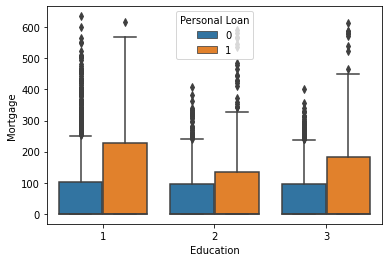

In [82]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=user_data)

**OBSERVATION :**

Person with Loan have high more mortgages


In [83]:
Loan_zipcode = user_data[user_data['Personal Loan']==1]['ZIP Code'].value_counts().head(10)
Loan_zipcode

94720    19
94305    13
92093     9
90095     8
90089     8
94304     8
92182     7
94022     6
95051     6
95616     6
Name: ZIP Code, dtype: int64

**OBSERVATION :**

These are the top 10 locations from where the coustomers previously applied for Personal Loan

In [84]:
var=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
user_data[var]=user_data[var].astype('category')

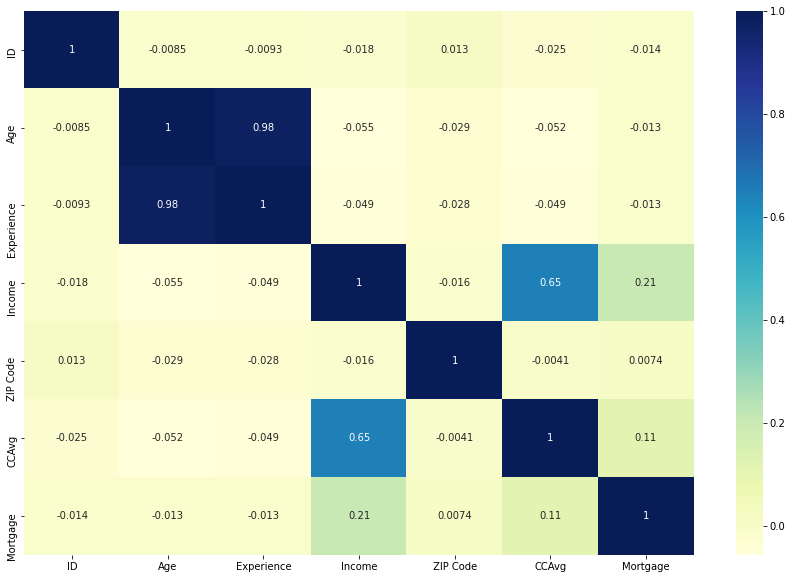

In [85]:
bank_corr=user_data.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(bank_corr,cmap="YlGnBu",annot=True)

In [87]:
user_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
